<a href="https://colab.research.google.com/github/saisiddharthnandhakumar/SpaceshipTitanicKaggle/blob/main/Spaceship_titanic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [96]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df_num = train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
df_cat = train[['HomePlanet','CryoSleep','Cabin','Destination','VIP','Transported']]

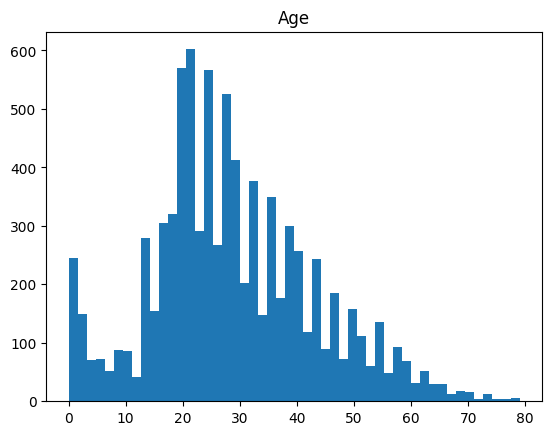

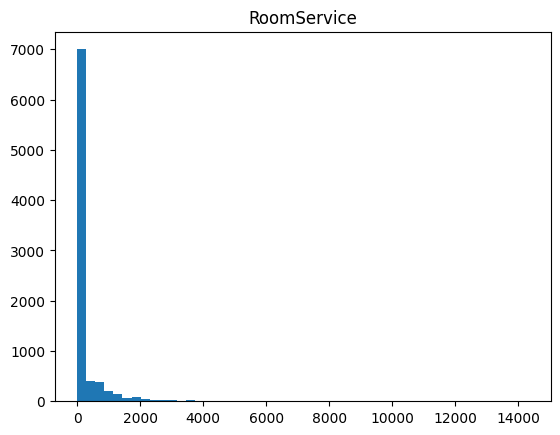

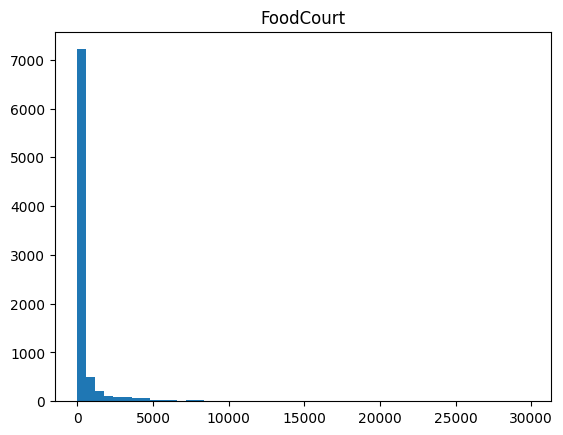

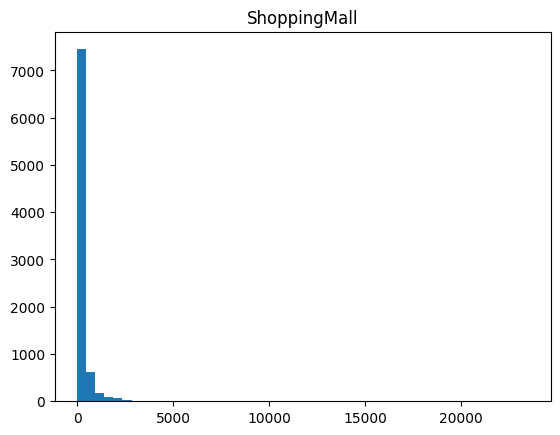

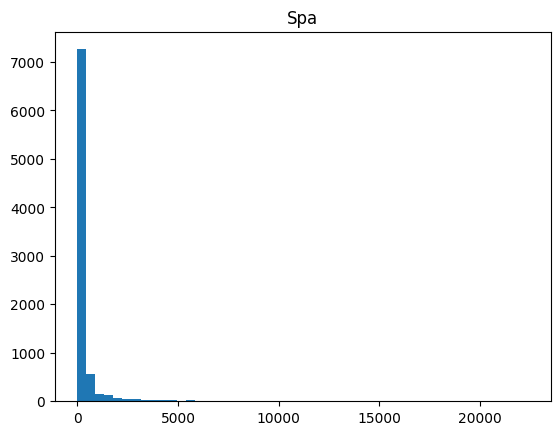

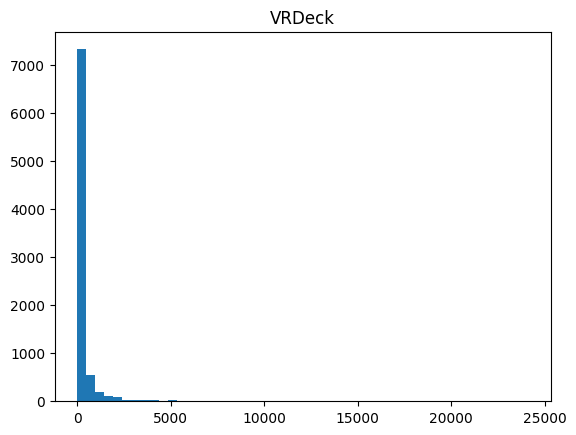

In [99]:
for i in df_num.columns:
  plt.hist(df_num[i], bins = 50)
  plt.title(i)
  plt.show()

In [100]:
#for i in df_cat.columns:
#  sns.barplot(x = df_cat[i].value_counts().index, y = df_cat[i].value_counts(), data = train).set_title(i)
#  plt.show()

In [101]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [102]:
test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

# Train Set Imputation

In [103]:
#Imputing Null values for Numerical Features
train.Age = train.Age.fillna(train.Age.mean())
train.RoomService = train.RoomService.fillna(train.RoomService.median())
train.FoodCourt = train.FoodCourt.fillna(train.FoodCourt.median())
train.ShoppingMall = train.ShoppingMall.fillna(train.ShoppingMall.median())
train.Spa = train.Spa.fillna(train.Spa.median())
train.VRDeck = train.VRDeck.fillna(train.VRDeck.median())

#Imputing Null values for Categorical Features
train.HomePlanet = train.HomePlanet.fillna(train.HomePlanet.mode().iloc[0])
train.CryoSleep = train.CryoSleep.fillna(train.CryoSleep.mode().iloc[0])
train.Cabin = train.Cabin.fillna(train.Cabin.mode().iloc[0])
train.Destination = train.Destination.fillna(train.Destination.mode().iloc[0])
train.VIP = train.VIP.fillna(train.VIP.mode().iloc[0])


# Test Set Imputation

In [104]:
#Imputing Null values for Numerical Features
test.Age = test.Age.fillna(test.Age.mean())
test.RoomService = test.RoomService.fillna(test.RoomService.median())
test.FoodCourt = test.FoodCourt.fillna(test.FoodCourt.median())
test.ShoppingMall = test.ShoppingMall.fillna(test.ShoppingMall.median())
test.Spa = test.Spa.fillna(test.Spa.median())
test.VRDeck = test.VRDeck.fillna(test.VRDeck.median())

#Imputing Null values for Categorical Features
test.HomePlanet = test.HomePlanet.fillna(test.HomePlanet.mode().iloc[0])
test.CryoSleep = test.CryoSleep.fillna(test.CryoSleep.mode().iloc[0])
test.Cabin = test.Cabin.fillna(test.Cabin.mode().iloc[0])
test.Destination = test.Destination.fillna(test.Destination.mode().iloc[0])
test.VIP = test.VIP.fillna(test.VIP.mode().iloc[0])

In [105]:
train.shape

(8693, 14)

In [106]:
test.shape

(4277, 13)

# Dummy Coding Train Set

In [107]:
# Select the categorical features to be one-hot encoded
df_cat = train[['HomePlanet','CryoSleep','Destination','VIP']]

# Perform one-hot encoding using pd.get_dummies()
df_encoded = pd.get_dummies(df_cat)

# Concatenate the encoded features with the original train set
train = pd.concat([train, df_encoded], axis=1)

# Remove the original categorical features if needed
train.drop(['HomePlanet','CryoSleep','Destination','VIP'], axis=1, inplace=True)

print(train)

     PassengerId     Cabin   Age  RoomService  FoodCourt  ShoppingMall  \
0        0001_01     B/0/P  39.0          0.0        0.0           0.0   
1        0002_01     F/0/S  24.0        109.0        9.0          25.0   
2        0003_01     A/0/S  58.0         43.0     3576.0           0.0   
3        0003_02     A/0/S  33.0          0.0     1283.0         371.0   
4        0004_01     F/1/S  16.0        303.0       70.0         151.0   
...          ...       ...   ...          ...        ...           ...   
8688     9276_01    A/98/P  41.0          0.0     6819.0           0.0   
8689     9278_01  G/1499/S  18.0          0.0        0.0           0.0   
8690     9279_01  G/1500/S  26.0          0.0        0.0        1872.0   
8691     9280_01   E/608/S  32.0          0.0     1049.0           0.0   
8692     9280_02   E/608/S  44.0        126.0     4688.0           0.0   

         Spa  VRDeck               Name  Transported  HomePlanet_Earth  \
0        0.0     0.0    Maham Ofraccu

# Dummy Coding Test Set

In [108]:
# Select the categorical features to be one-hot encoded
df_cat = test[['HomePlanet','CryoSleep','Destination','VIP']]

# Perform one-hot encoding using pd.get_dummies()
df_encoded = pd.get_dummies(df_cat)

# Concatenate the encoded features with the original train set
test = pd.concat([test, df_encoded], axis=1)

# Remove the original categorical features if needed
test.drop(['HomePlanet','CryoSleep','Destination','VIP'], axis=1, inplace=True)

print(test)

     PassengerId     Cabin        Age  RoomService  FoodCourt  ShoppingMall  \
0        0013_01     G/3/S  27.000000          0.0        0.0           0.0   
1        0018_01     F/4/S  19.000000          0.0        9.0           0.0   
2        0019_01     C/0/S  31.000000          0.0        0.0           0.0   
3        0021_01     C/1/S  38.000000          0.0     6652.0           0.0   
4        0023_01     F/5/S  20.000000         10.0        0.0         635.0   
...          ...       ...        ...          ...        ...           ...   
4272     9266_02  G/1496/S  34.000000          0.0        0.0           0.0   
4273     9269_01   G/160/P  42.000000          0.0      847.0          17.0   
4274     9271_01   D/296/P  28.658146          0.0        0.0           0.0   
4275     9273_01   D/297/P  28.658146          0.0     2680.0           0.0   
4276     9277_01  G/1498/S  43.000000          0.0        0.0           0.0   

         Spa  VRDeck              Name  HomePlanet_

In [109]:
train.Transported

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [110]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train['Transported'] = label_encoder.fit_transform(train['Transported'])
print(train.Transported)

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64


# Scaling

In [111]:
train_scaled

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,B/0/P,0.705882,0.000000,0.000000,0.000000,0.000000,0.000,Maham Ofracculy,0,0,1,0,0,0,1
1,0002_01,F/0/S,-0.176471,2.658537,0.147541,1.136364,10.358491,1.100,Juanna Vines,1,1,0,0,0,0,1
2,0003_01,A/0/S,1.823529,1.048780,58.622951,0.000000,126.698113,1.225,Altark Susent,0,0,1,0,0,0,1
3,0003_02,A/0/S,0.352941,0.000000,21.032787,16.863636,62.811321,4.825,Solam Susent,0,0,1,0,0,0,1
4,0004_01,F/1/S,-0.647059,7.390244,1.147541,6.863636,10.660377,0.050,Willy Santantines,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,A/98/P,0.823529,0.000000,111.786885,0.000000,31.000000,1.850,Gravior Noxnuther,0,0,1,0,1,0,0
8689,9278_01,G/1499/S,-0.529412,0.000000,0.000000,0.000000,0.000000,0.000,Kurta Mondalley,0,1,0,0,0,1,0
8690,9279_01,G/1500/S,-0.058824,0.000000,0.000000,85.090909,0.018868,0.000,Fayey Connon,1,1,0,0,0,0,1
8691,9280_01,E/608/S,0.294118,0.000000,17.196721,0.000000,6.660377,80.875,Celeon Hontichre,0,0,1,0,1,0,0


In [112]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

train_scaled = train.copy()
test_scaled = test.copy()

train_scaled[numerical_cols] = scaler.fit_transform(train_scaled[numerical_cols])
test_scaled[numerical_cols] = scaler.transform(test_scaled[numerical_cols])

In [113]:
train_scaled


,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,B/0/P,0.705882,0.000000,0.000000,0.000000,0.000000,0.000,Maham Ofracculy,0,0,1,0,0,0,1
1,0002_01,F/0/S,-0.176471,2.658537,0.147541,1.136364,10.358491,1.100,Juanna Vines,1,1,0,0,0,0,1
2,0003_01,A/0/S,1.823529,1.048780,58.622951,0.000000,126.698113,1.225,Altark Susent,0,0,1,0,0,0,1
3,0003_02,A/0/S,0.352941,0.000000,21.032787,16.863636,62.811321,4.825,Solam Susent,0,0,1,0,0,0,1
4,0004_01,F/1/S,-0.647059,7.390244,1.147541,6.863636,10.660377,0.050,Willy Santantines,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,A/98/P,0.823529,0.000000,111.786885,0.000000,31.000000,1.850,Gravior Noxnuther,0,0,1,0,1,0,0
8689,9278_01,G/1499/S,-0.529412,0.000000,0.000000,0.000000,0.000000,0.000,Kurta Mondalley,0,1,0,0,0,1,0
8690,9279_01,G/1500/S,-0.058824,0.000000,0.000000,85.090909,0.018868,0.000,Fayey Connon,1,1,0,0,0,0,1
8691,9280_01,E/608/S,0.294118,0.000000,17.196721,0.000000,6.660377,80.875,Celeon Hontichre,0,0,1,0,1,0,0


In [114]:
train.shape

(8693, 16)

In [115]:
test.shape

(4277, 15)

In [116]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [117]:
train_scaled.columns

Index(['PassengerId', 'Cabin', 'Age', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e'],
      dtype='object')

In [118]:
# Define the logistic regression model
lr = LogisticRegression(max_iter=2000)

# Select the feature columns
features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
            'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
            'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e']

# Split the features and target variable from the train_scaled DataFrame
X = train_scaled[features]
y = train_scaled['Transported']

# Perform cross-validation
cv = cross_val_score(lr, X, y, cv=5)

# Print the cross-validation scores
print(cv)
print(cv.mean())


[0.77343301 0.77630822 0.78148361 0.78596087 0.79574223]
0.7825855897765405


In [119]:
Xx = train[features]
yy = train['Transported']

xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,Xx,yy,cv=5)
print(cv)
print(cv.mean())

[0.77458309 0.77400805 0.78550891 0.79746835 0.78711162]
0.7837360068978706


In [120]:
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X,y,cv=5)
print(cv)
print(cv.mean())

[0.77458309 0.77400805 0.78550891 0.79746835 0.78711162]
0.7837360068978706


In [121]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X,y,cv=5)
print(cv)
print(cv.mean())

[0.77458309 0.77688327 0.77400805 0.78135788 0.79113924]
0.7795943067421657


In [122]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X,y,cv=5)
print(cv)
print(cv.mean())

[0.75618171 0.75963197 0.74410581 0.76006904 0.77963176]
0.7599240598971275


In [123]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X,y,cv=5)
print(cv)
print(cv.mean())

[0.77515814 0.77400805 0.78838413 0.80149597 0.79919448]
0.787648153013087


In [124]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('knn',knn),('rf',rf),('svc',svc),('xgb',xgb)], voting = 'soft')

In [125]:
cv = cross_val_score(voting_clf,X,y,cv=5)
print(cv)
print(cv.mean())

[0.78205865 0.77745831 0.78320874 0.79574223 0.7986191 ]
0.7874174078590992


In [126]:
voting_clf.fit(X, y)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier(random_state=1)),
                             ('svc', SVC(probability=True)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=1, ...))],
                 voting='soft')

In [127]:
test_scaled['Transported'] = voting_clf.predict(test_scaled[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars','Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e']])

In [128]:
submission1 = test_scaled[['PassengerId','Transported']]

In [129]:
submission1['Transported'] = submission1['Transported'].replace({0: False, 1: True})

<ipython-input-129-db2ad0b71f3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission1['Transported'] = submission1['Transported'].replace({0: False, 1: True})


In [130]:
submission1['Transported']

0        True
1       False
2        True
3        True
4        True
        ...  
4272     True
4273    False
4274     True
4275     True
4276    False
Name: Transported, Length: 4277, dtype: bool

In [131]:
submission1.to_csv('submission1.csv', index = False)